<a href="https://colab.research.google.com/github/mekha1278/codealpha_task/blob/main/CodeAlpha_carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("car data.csv")
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [2]:
df=df.drop('Car_Name',axis=1)
print(df)


     Year  Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0    2014           3.35           5.59       27000    Petrol       Dealer   
1    2013           4.75           9.54       43000    Diesel       Dealer   
2    2017           7.25           9.85        6900    Petrol       Dealer   
3    2011           2.85           4.15        5200    Petrol       Dealer   
4    2014           4.60           6.87       42450    Diesel       Dealer   
..    ...            ...            ...         ...       ...          ...   
296  2016           9.50          11.60       33988    Diesel       Dealer   
297  2015           4.00           5.90       60000    Petrol       Dealer   
298  2009           3.35          11.00       87934    Petrol       Dealer   
299  2017          11.50          12.50        9000    Diesel       Dealer   
300  2016           5.30           5.90        5464    Petrol       Dealer   

    Transmission  Owner  
0         Manual      0  
1         M

In [3]:

df['Car_Age'] = 2025 - df['Year']
df = df.drop('Year', axis=1)
print(df)


     Selling_Price  Present_Price  Driven_kms Fuel_Type Selling_type  \
0             3.35           5.59       27000    Petrol       Dealer   
1             4.75           9.54       43000    Diesel       Dealer   
2             7.25           9.85        6900    Petrol       Dealer   
3             2.85           4.15        5200    Petrol       Dealer   
4             4.60           6.87       42450    Diesel       Dealer   
..             ...            ...         ...       ...          ...   
296           9.50          11.60       33988    Diesel       Dealer   
297           4.00           5.90       60000    Petrol       Dealer   
298           3.35          11.00       87934    Petrol       Dealer   
299          11.50          12.50        9000    Diesel       Dealer   
300           5.30           5.90        5464    Petrol       Dealer   

    Transmission  Owner  Car_Age  
0         Manual      0       11  
1         Manual      0       12  
2         Manual      0       

In [4]:
car_age = df['Car_Age']
df = df.drop('Car_Age', axis=1)
df.insert(0, 'Car_Ages', car_age)
print(df)

     Car_Ages  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0          11           3.35           5.59       27000    Petrol   
1          12           4.75           9.54       43000    Diesel   
2           8           7.25           9.85        6900    Petrol   
3          14           2.85           4.15        5200    Petrol   
4          11           4.60           6.87       42450    Diesel   
..        ...            ...            ...         ...       ...   
296         9           9.50          11.60       33988    Diesel   
297        10           4.00           5.90       60000    Petrol   
298        16           3.35          11.00       87934    Petrol   
299         8          11.50          12.50        9000    Diesel   
300         9           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Deale

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Selling_type']=le.fit_transform(df['Selling_type'])
df['Transmission']=le.fit_transform(df['Transmission'])
print(df)


     Car_Ages  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0          11           3.35           5.59       27000          2   
1          12           4.75           9.54       43000          1   
2           8           7.25           9.85        6900          2   
3          14           2.85           4.15        5200          2   
4          11           4.60           6.87       42450          1   
..        ...            ...            ...         ...        ...   
296         9           9.50          11.60       33988          1   
297        10           4.00           5.90       60000          2   
298        16           3.35          11.00       87934          2   
299         8          11.50          12.50        9000          1   
300         9           5.30           5.90        5464          2   

     Selling_type  Transmission  Owner  
0               0             1      0  
1               0             1      0  
2               0             1     

In [6]:
X = df[['Present_Price', 'Driven_kms', 'Car_Ages','Fuel_Type','Transmission', 'Selling_type', 'Owner']]
y=df['Selling_Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("full table",df.shape)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_tarin",y_test.shape)



full table (301, 8)
x_train (240, 7)
x_test (61, 7)
y_train (240,)
y_tarin (61,)


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.5315798889686323
Mean Absolute Error: 1.2219323621753846
R2 Score: 0.8466902419663829


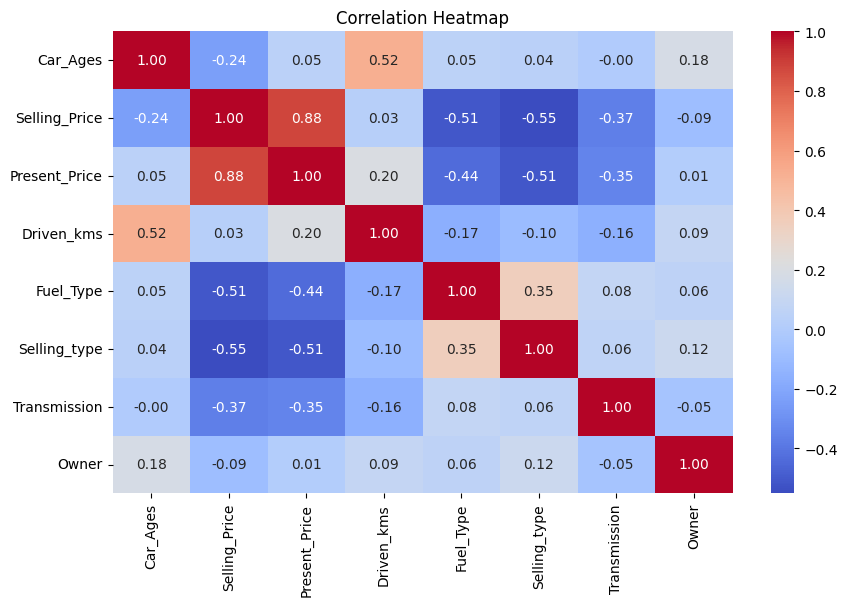

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


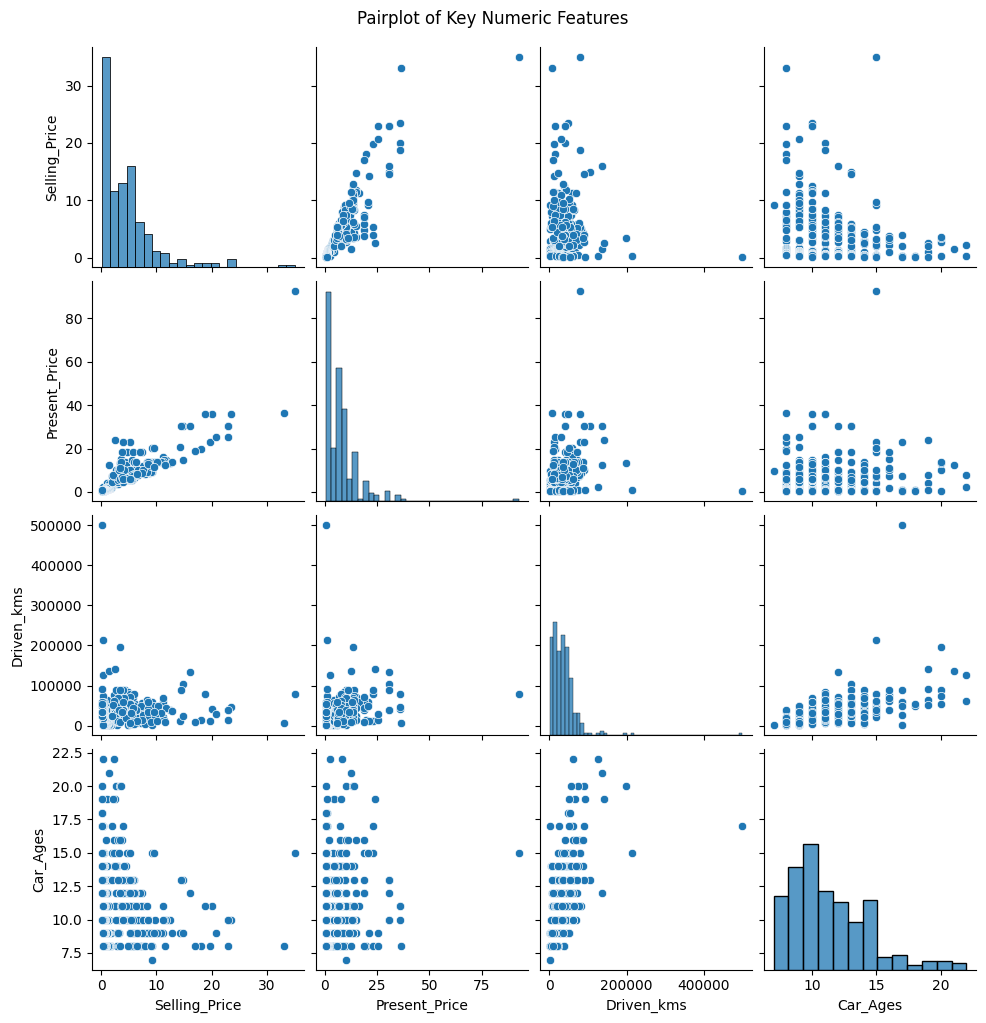

In [12]:
sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms', 'Car_Ages']])
plt.suptitle("Pairplot of Key Numeric Features", y=1.02)
plt.show()

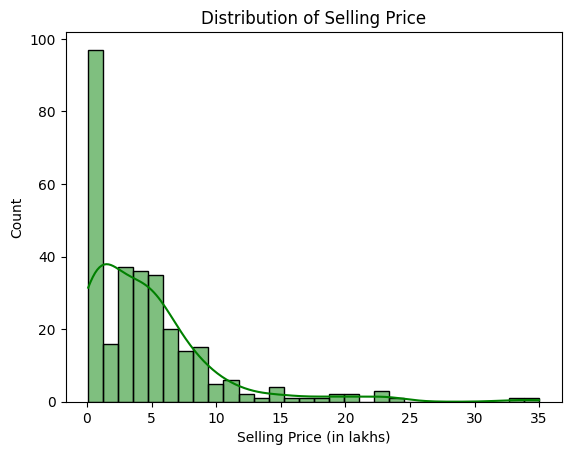

In [13]:
sns.histplot(df['Selling_Price'], kde=True, color='green', bins=30)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Count")
plt.show()

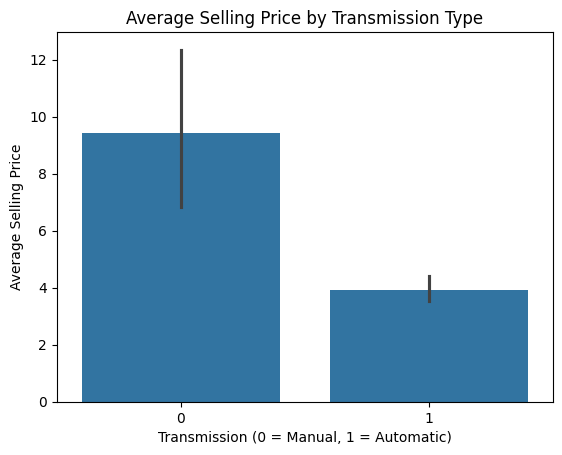

In [14]:
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.title("Average Selling Price by Transmission Type")
plt.xlabel("Transmission (0 = Manual, 1 = Automatic)")
plt.ylabel("Average Selling Price")
plt.show()

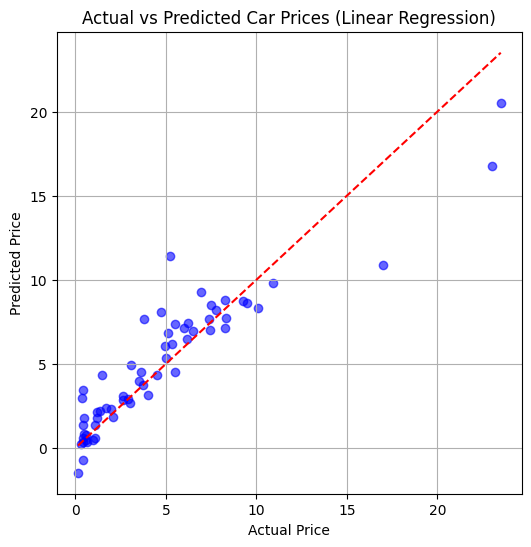

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Car Prices (Linear Regression)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()